In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/complaints.csv'
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [0]:
data['Date received']=pd.to_datetime(data['Date received'],format='%Y-%m-%d')
data['Date sent to company']=pd.to_datetime(data['Date sent to company'],format='%Y-%m-%d')
data['year'] =data['Date received'].dt.year
data['month'] =data['Date received'].dt.month
data['season']=data['Date received'].dt.quarter

In [0]:
data['Tags'].value_counts()

Servicemember                    52627
Older American                   27803
Older American, Servicemember     6998
Name: Tags, dtype: int64

In [0]:
data.isna().sum()

Date received                         0
Product                               0
Sub-product                      235165
Issue                                 0
Sub-issue                        563408
Consumer complaint narrative    1036855
Company public response          961714
Company                               0
State                             26229
ZIP code                         146449
Tags                            1338359
Consumer consent provided?       626548
Submitted via                         0
Date sent to company                  0
Company response to consumer          1
Timely response?                      0
Consumer disputed?               779916
Complaint ID                          0
dtype: int64

**Sentiment**

In [0]:
from textblob import TextBlob

In [0]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

In [0]:
data['Consumer complaint narrative'] = preprocess(data['Consumer complaint narrative'])
data.dropna(axis=0,subset=['Consumer complaint narrative'],inplace=True)
data['Sentiment'] = data['Consumer complaint narrative'].map(lambda x:TextBlob(x).sentiment.polarity)

In [0]:
data.to_csv('data_textblob.csv')

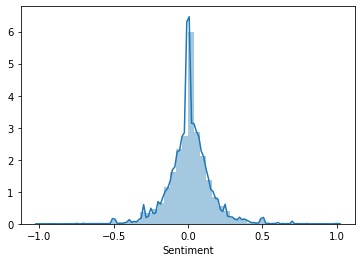

In [0]:
sns.distplot(data['Sentiment'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

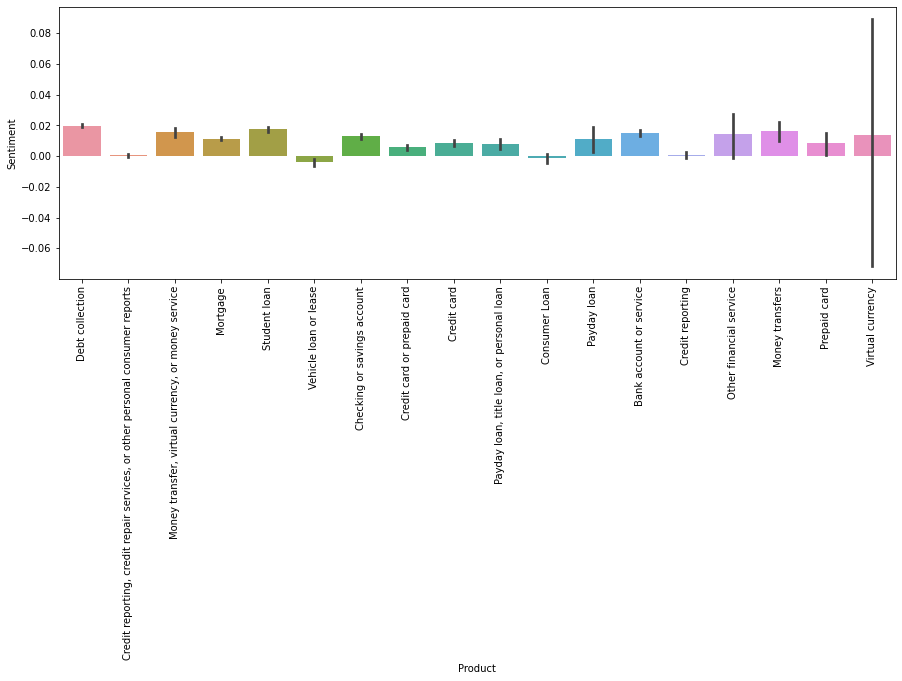

In [0]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Product'],y=data['Sentiment'])
plt.xticks(rotation=90)

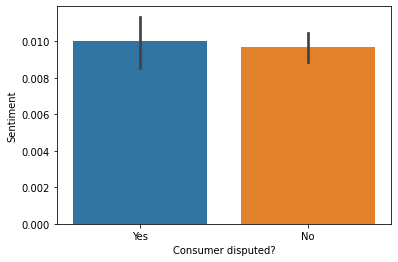

In [0]:
sns.barplot(x=data['Consumer disputed?'],y=data['Sentiment'])

In [0]:
data['Consumer disputed?'].value_counts()

No     128260
Yes     35807
Name: Consumer disputed?, dtype: int64

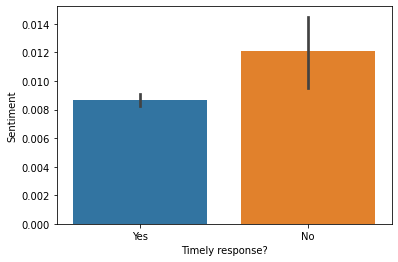

In [0]:
sns.barplot(x=data['Timely response?'],y=data['Sentiment'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

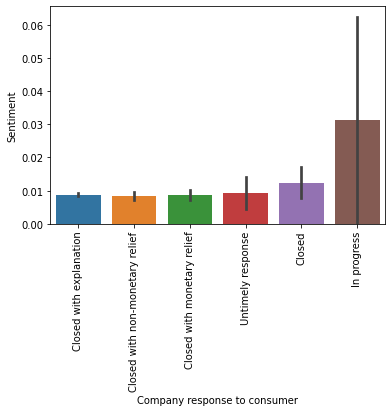

In [0]:
sns.barplot(x=data['Company response to consumer'],y=data['Sentiment'])
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text major ticklabel objects>)

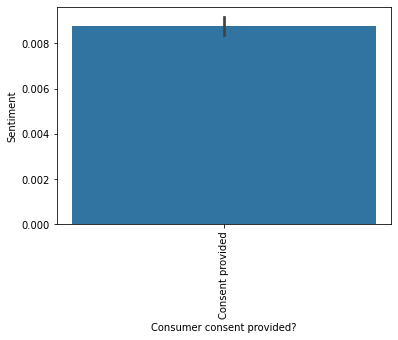

In [0]:
sns.barplot(x=data['Consumer consent provided?'],y=data['Sentiment'])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

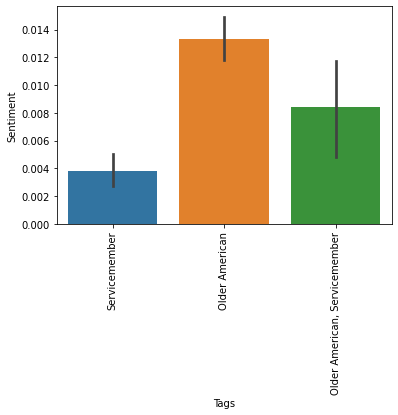

In [0]:
sns.barplot(x=data['Tags'],y=data['Sentiment'])
plt.xticks(rotation=90)

### **ngram**

In [0]:

import re
import matplotlib.pylab as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
ndata=data[data['year']>2017]
ndata=ndata[ndata['year']<2020]
ndata.dropna(axis=0,subset=['Consumer complaint narrative'],inplace=True)

In [0]:
ndata.shape

(243393, 21)

In [0]:
temp=ndata.sample(20000) 

In [0]:
stop_words.add('xxxx')
stop_words.add('xx')
stop_words.add('00')

In [0]:
def ngrams(df,n):
  ret = []
  big = df.str.lower()
  big = big.to_list()
  for i in big:
    i = re.sub(r'[^a-zA-Z0-9\s]', ' ', i).split()
    i = [w for w in i if not w in stop_words]
    ret = ret + [" ".join(ngram) for ngram in zip(*[i[j:] for j in range(n) ])]
  a = pd.Series( (v for v in ret ) ).value_counts()
  df1 = pd.DataFrame([a.index,a.values]).transpose()
  df1.columns = ['ngrams','Words']
  return df1


In [0]:
plt.xticks(rotation = 90)
df1 = ngrams(ndata['Consumer complaint narrative'],1)
sns.barplot(x =  df1['Words'].loc[:15], y = df1['ngrams'].loc[:15])

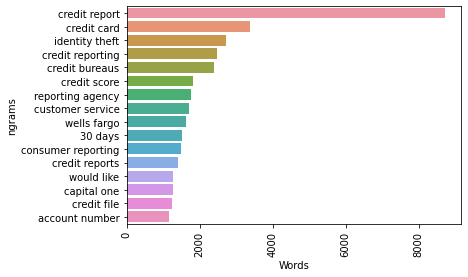

In [0]:
plt.xticks(rotation = 90)
df2 = ngrams(temp['Consumer complaint narrative'],2)
sns.barplot(x =  df2['Words'].loc[:15], y = df2['ngrams'].loc[:15])

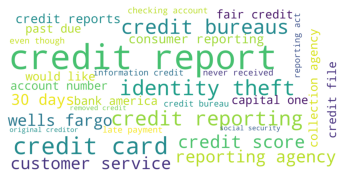

In [0]:
cloud(df2)

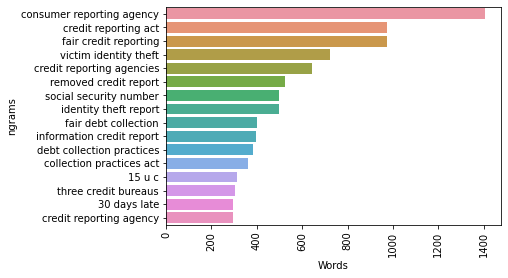

In [0]:
plt.xticks(rotation = 90)
df3 = ngrams(temp['Consumer complaint narrative'],3)
sns.barplot(x =  df3['Words'].loc[:15], y = df3['ngrams'].loc[:15])

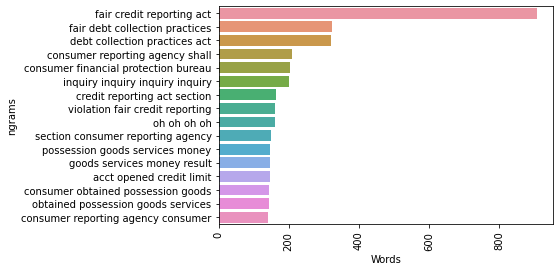

In [0]:
plt.xticks(rotation = 90)
#plt.title('Stopdrinking 2grams')
df4 = ngrams(temp['Consumer complaint narrative'],4)
sns.barplot(x =  df4['Words'].loc[:15], y = df4['ngrams'].loc[:15])
df4.to_csv('df4.csv')

In [0]:
def cloud(df):
  dic=df.set_index('ngrams')['Words'].to_dict()
  wordcloud = WordCloud(background_color="white", scale=64,max_words=80,
                       contour_width=3, contour_color='steelblue').generate_from_frequencies(dic)
  plt.imshow(wordcloud)
  plt.axis('off')
  #max_words=300

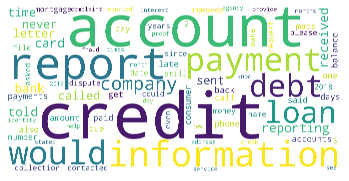

In [0]:
#df1=pd.read_csv('1gram.csv')
cloud(df1)
plt.savefig('wordcloud1.jpg',dpi=200)

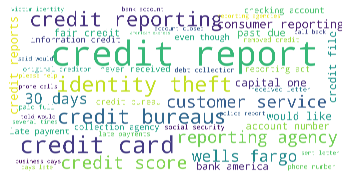

In [0]:
cloud(df2)
plt.savefig('wordcloud2.jpg',dpi=200)

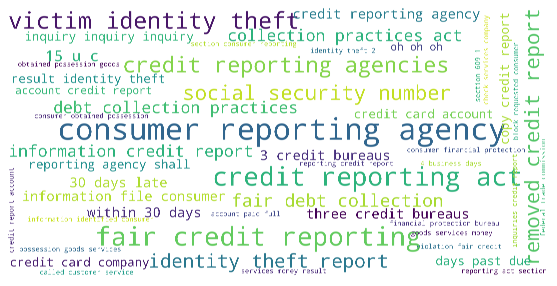

In [0]:
plt.figure(figsize=(10,5))
y=cloud(df3)
plt.savefig('wordcloud3.jpg',dpi=200)

In [0]:
d = temp[temp['Consumer complaint narrative'].str.contains('credit reporting')]
#d = d[d['Consumer complaint narrative'].str.contains('reporting agency')]
#d = d[d['Consumer complaint narrative'].str.contains('agency')]
print(d.iloc[4,5])

In 2013 I purchased a phone from XXXX. The information given to me by the salesperson in the corporate owned store was incorrect and fraudulent. Approximately one week later I returned the phone, unused, to the store. I explained to the employee and subsequently explained to the company what happened in writing. Since that time I moved and lost track of these writings, although I am still going through 6 year old papers trying to locate this information. XXXX reported the amount of approximately {$390.00} as a delinquency to all credit reporting companies. I wrote to all 3 companies and explained that this matter was in dispute. Three years later the statute of limitations in my home state of Delaware expired. Nevertheless, the credit reporting companies allowed Enhanced Recovery Company to continue to pursue this matter. I recently wrote to all three companies by certified mail, return receipt requested, and asked them to investigate this matter and remove it from my credit report. XX

Economy

In [0]:
path = 'drive/My Drive/complaints.csv'
data = pd.read_csv(path)

In [0]:
byyear = data.groupby('year',as_index=False)['Complaint ID'].count()
byyear = byyear.iloc[0:9,:]

In [0]:
GDP=[15542.58,16197.01,16784.85,17521.75,18219.3,18707.19,19485.39,20544.34,21200]

In [0]:
unemploy = [8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9,3.7]

In [0]:
byyear['GDP']=GDP
byyear['Unemployment Rate']=unemploy
byyear.rename(columns={'Complaint ID':'Count'},inplace=True)

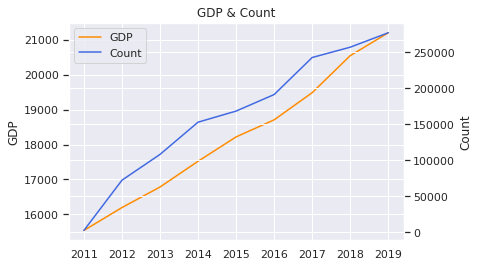

In [0]:
sns.set()
fig, ax1 = plt.subplots()
#figsize=(8, 5),dpi=100
ax2 = ax1.twinx()

l1, = ax1.plot(byyear['year'], byyear['GDP'], 'darkorange')
l2, = ax2.plot(byyear['year'], byyear['Count'], 'royalblue')

ax1.set_ylabel('GDP')
ax2.set_ylabel('Count')
plt.legend(handles = [l1, l2,], labels = ['GDP', 'Count'], loc='best')
ax1.set_title('GDP & Count')
plt.show()

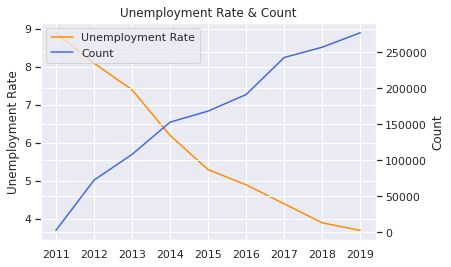

In [0]:
sns.set()
fig, ax1 = plt.subplots()
#figsize=(8, 5),dpi=100
ax2 = ax1.twinx()

l1, = ax1.plot(byyear['year'], byyear['Unemployment Rate'], 'darkorange')
l2, = ax2.plot(byyear['year'], byyear['Count'], 'royalblue')

ax1.set_ylabel('Unemployment Rate')
ax2.set_ylabel('Count')
plt.legend(handles = [l1, l2,], labels = ['Unemployment Rate', 'Count'], loc='best')
ax1.set_title('Unemployment Rate & Count')
plt.show()

**Product Category** 

In [0]:
y2011=data[data['year']==2011]
y2011['Product'].value_counts()
print(len(y2011['Product'].unique()))

2


In [0]:
y2012=data[data['year']==2012]
y2012['Product'].value_counts()
print(len(y2012['Product'].unique()))

6


In [0]:
y2013=data[data['year']==2013]
y2013['Product'].value_counts()
print(len(y2013['Product'].unique()))

9


In [0]:
y2014=data[data['year']==2014]
y2014['Product'].value_counts()
print(len(y2014['Product'].unique()))

12


In [0]:
y2015=data[data['year']==2015]
y2015['Product'].value_counts()
print(len(y2015['Product'].unique()))

12


In [0]:
y2016=data[data['year']==2015]
y2016['Product'].value_counts()
print(len(y2016['Product'].unique()))

12


In [0]:
y2017=data[data['year']==2017]
y2017['Product'].value_counts()
print(len(y2017['Product'].unique()))
y2017['Product'].unique()

18


array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Credit card', 'Mortgage',
       'Vehicle loan or lease', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Consumer Loan', 'Student loan',
       'Payday loan', 'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Credit reporting',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Virtual currency'], dtype=object)

In [0]:
y2018=data[data['year']==2018]
y2018['Product'].value_counts()
print(len(y2018['Product'].unique()))
y2018['Product'].unique()

9


array(['Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Vehicle loan or lease',
       'Checking or savings account', 'Credit card or prepaid card',
       'Money transfer, virtual currency, or money service',
       'Student loan', 'Payday loan, title loan, or personal loan'],
      dtype=object)

In [0]:
y2019=data[data['year']==2019]
y2019['Product'].value_counts()
print(len(y2019['Product'].unique()))
y2018['Product'].unique()

9


array(['Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Vehicle loan or lease',
       'Checking or savings account', 'Credit card or prepaid card',
       'Money transfer, virtual currency, or money service',
       'Student loan', 'Payday loan, title loan, or personal loan'],
      dtype=object)

In [0]:
data.groupby('year')['Complaint ID'].count()

year
2011      2536
2012     72373
2013    108217
2014    153043
2015    168475
2016    191469
2017    242967
2018    257317
2019    277393
2020     74604
Name: Complaint ID, dtype: int64